##   Student Performance Indicator
###  Life cycle of Machine learning Project
####  1. Understanding the Problem Statement
####  2. Data Collection
####  3. Data Checks to perform
####  4. Exploratory data analysis
####  5. Data Pre-Processing
####  6. Model Training
####  7. Choose best model


1) Problem statement

	
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


In [9]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Import CSV data as Pandas dataframe

In [10]:
df = pd.read_csv('data/stud.csv')

Show top 5 records

In [11]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Shape of the dataset:

In [12]:
df.shape

(1000, 8)

Dataset Information

In [13]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

In [14]:
# for col in col_list:
#     print(df[col].value_counts()).col_list = list(df.select_dtypes(include=['object']).columns)


Check for null values

In [15]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

Check for duplicates:

In [16]:
df.duplicated().sum()

np.int64(0)

There are no duplicates in the given dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Checking the number of unique values

In [18]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [19]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Insight

From above description of numerical data, all means are very close to each other - between 66 and 68.05;
All standard deviations are also close - between 14.6 and 15.19;
While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

3.7 Exploring Data

In [20]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [21]:
col_list = list(df.select_dtypes(include=['object']).columns)
for col in col_list:
    print(f"Categories in {col} variable:  ",end=" ")
    print(df[col].unique())

Categories in gender variable:   ['female' 'male']
Categories in race_ethnicity variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable:   ['standard' 'free/reduced']
Categories in test_preparation_course variable:   ['none' 'completed']


In [22]:
num_features = [x for x in list(df.select_dtypes(include=['int']).columns)]
cat_features = [x for x in list(df.select_dtypes(include=['object']).columns)]
print(f"We have {len(num_features)} numerical features: {num_features}")
print(f"We have {len(cat_features)} categorical features: {cat_features}")


We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


Adding columns total score and average

In [23]:
df['total score'] = df['math_score']+df['reading_score']+df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [24]:
math_full, reading_full, writing_full = df[df['math_score'] == 100]['average'].count(),df[df['reading_score'] == 100]['average'].count(),df[df['writing_score'] == 100]['average'].count()
for col in num_features:
    print(f"No. of students with full marks in {col} : {df[df[col]==100]['average'].count()}")    

No. of students with full marks in math_score : 7
No. of students with full marks in reading_score : 17
No. of students with full marks in writing_score : 14


In [25]:
for col in num_features:
    print(f"No. of students with marks less than 20 in {col} : {df[df[col]<20]['average'].count()}")

No. of students with marks less than 20 in math_score : 4
No. of students with marks less than 20 in reading_score : 1
No. of students with marks less than 20 in writing_score : 3


Insights

From above values we get students have performed the worst in Maths
Best performance is in reading section


4.  Exploring Data ( Visualization )

4.1 Visualize average score distribution to make some conclusion using Histogram and Kernel Distribution Function (KDE)

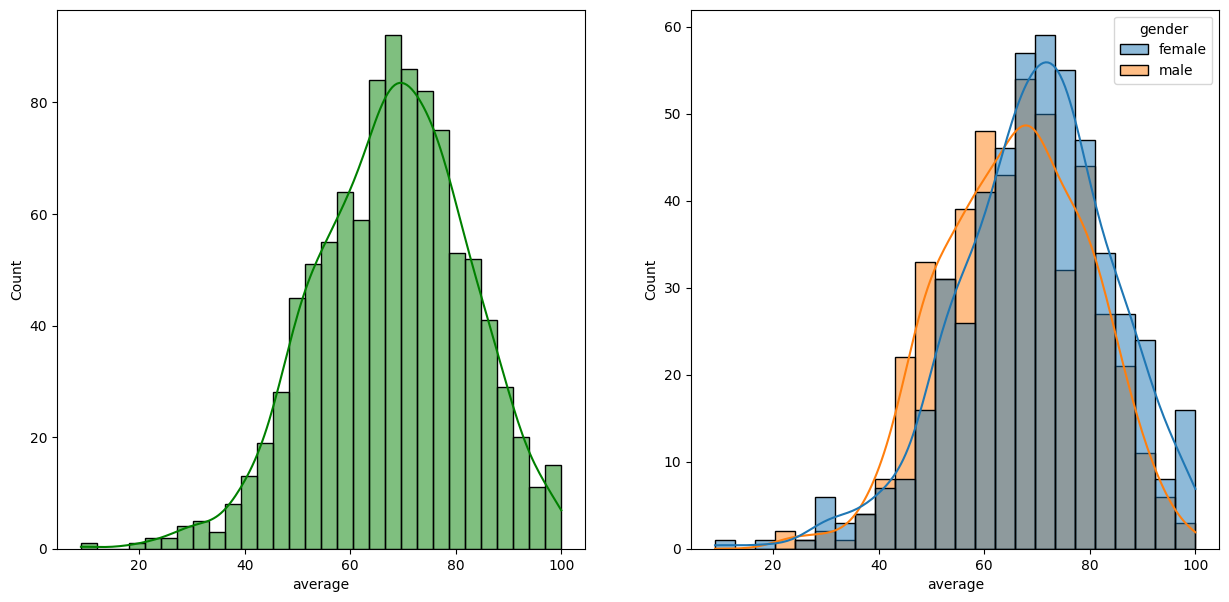

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()


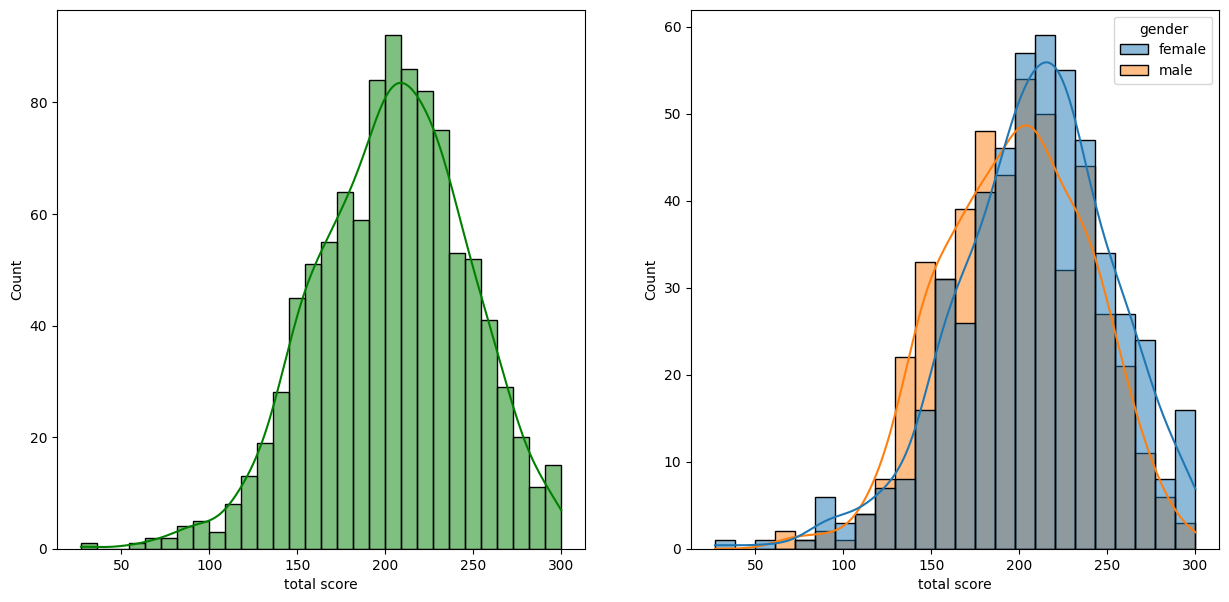

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()


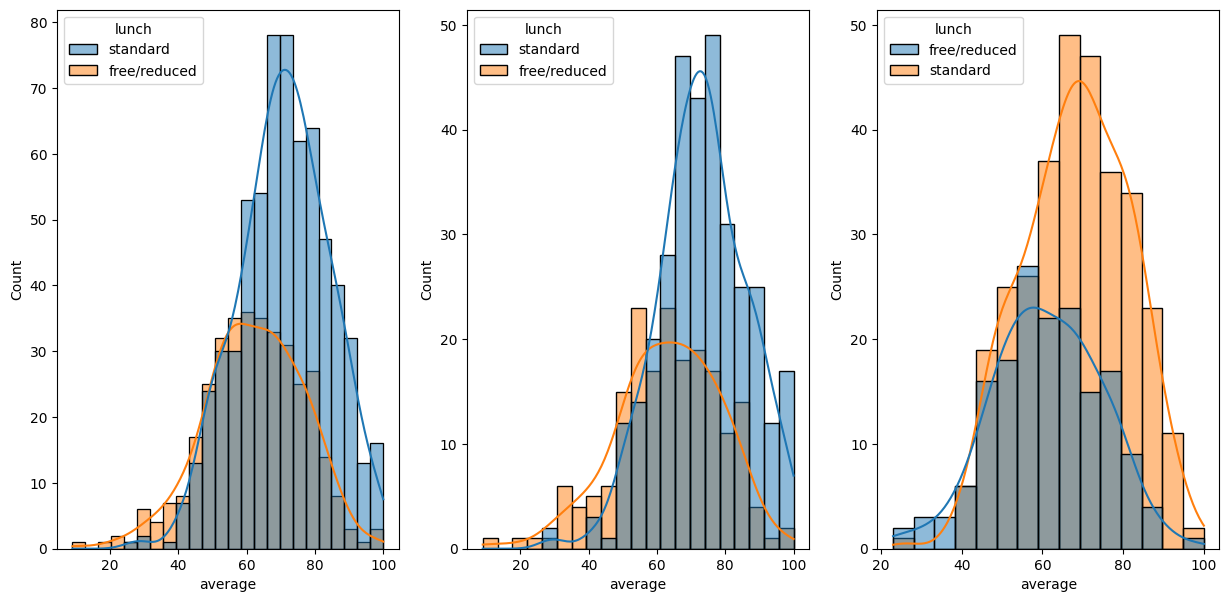

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

Standard lunch helps perform in an exam be it a male or a female

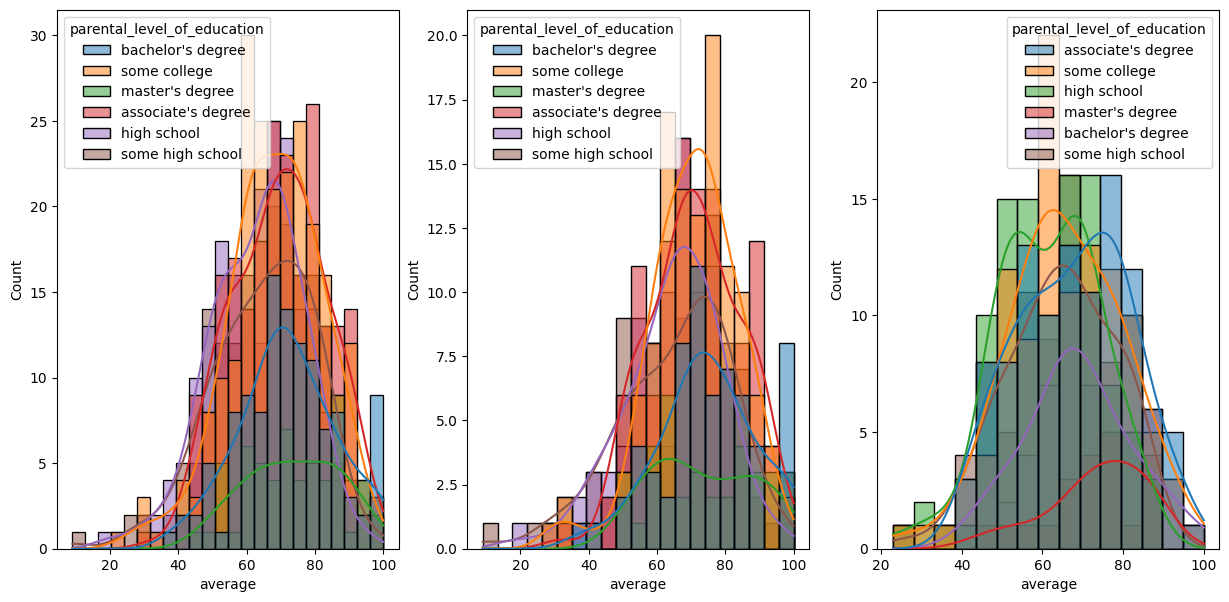

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

In [30]:
pivot_table = pd.pivot_table(
    df,
    index='parental_level_of_education',
    columns='gender',
    aggfunc='size',  # Counts occurrences
    fill_value=0     # Fill missing values with 0
)

In [31]:
pivot_table

gender,female,male
parental_level_of_education,,
associate's degree,116,106
bachelor's degree,63,55
high school,94,102
master's degree,36,23
some college,118,108
some high school,91,88


In [32]:
pivot_table_avg = pd.pivot_table(
    df,
    index='parental_level_of_education',
    columns='gender',
    values='average',
    aggfunc='mean',  # Calculates the average marks
    fill_value=0     # Fill missing values with 0
)
pivot_table_avg

gender,female,male
parental_level_of_education,,
associate's degree,71.123563,67.867925
bachelor's degree,74.671958,68.775758
high school,64.748227,61.575163
master's degree,73.648148,73.521739
some college,71.002825,65.716049
some high school,65.564103,64.636364


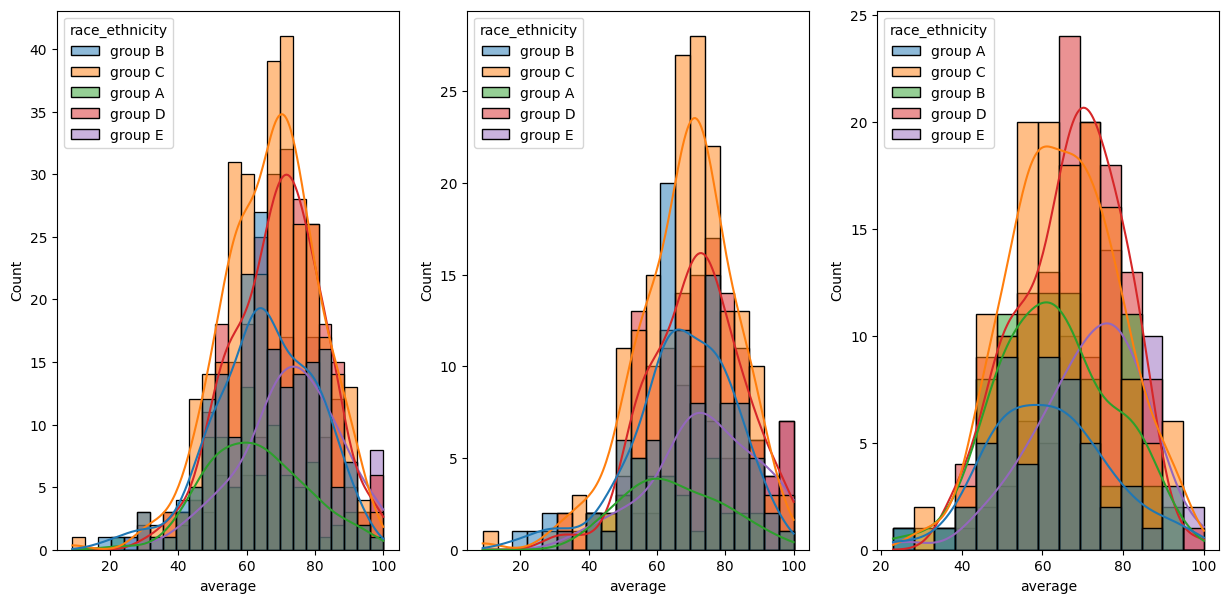

In [33]:
fig, axs = plt.subplots(1, 3, figsize=(15, 7))
plt.subplot(131)
sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

In [34]:
pivot_table_race_ethnicity = pd.pivot_table(
    df,
    index='race_ethnicity',  # Include both levels in the index
    columns='gender',
    values='average',
    aggfunc='mean',  # For example, calculate the average marks
    fill_value=0     # Fill missing values with 0
)


In [35]:
pivot_table_race_ethnicity

gender,female,male
race_ethnicity,,
group A,65.129630,61.540881
group B,67.509615,63.000000
group C,68.585185,65.249400
group D,71.439276,66.987469
group E,74.062802,71.478873


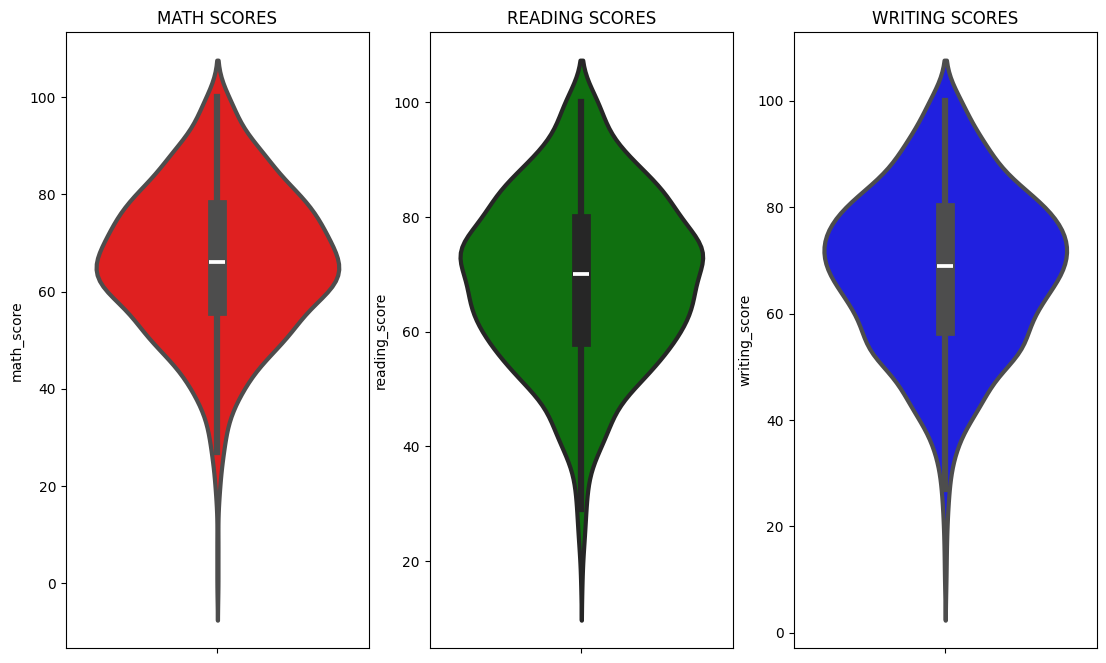

In [36]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

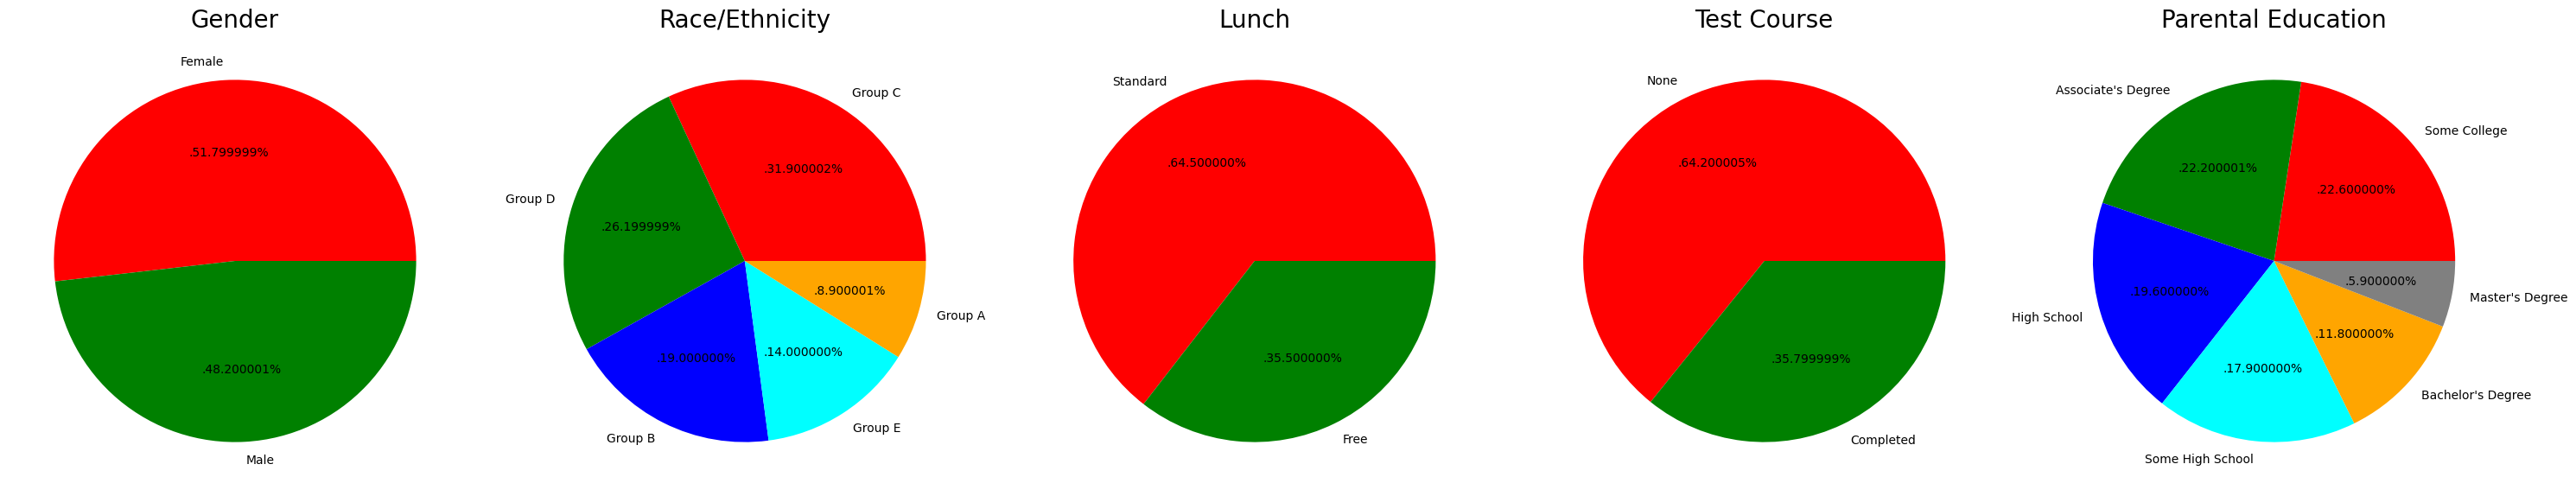

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total score                  1000 non-null   int64  
 9   average                      1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB


UNIVARIATE ANALYSIS (How is the distribution of Gender?)

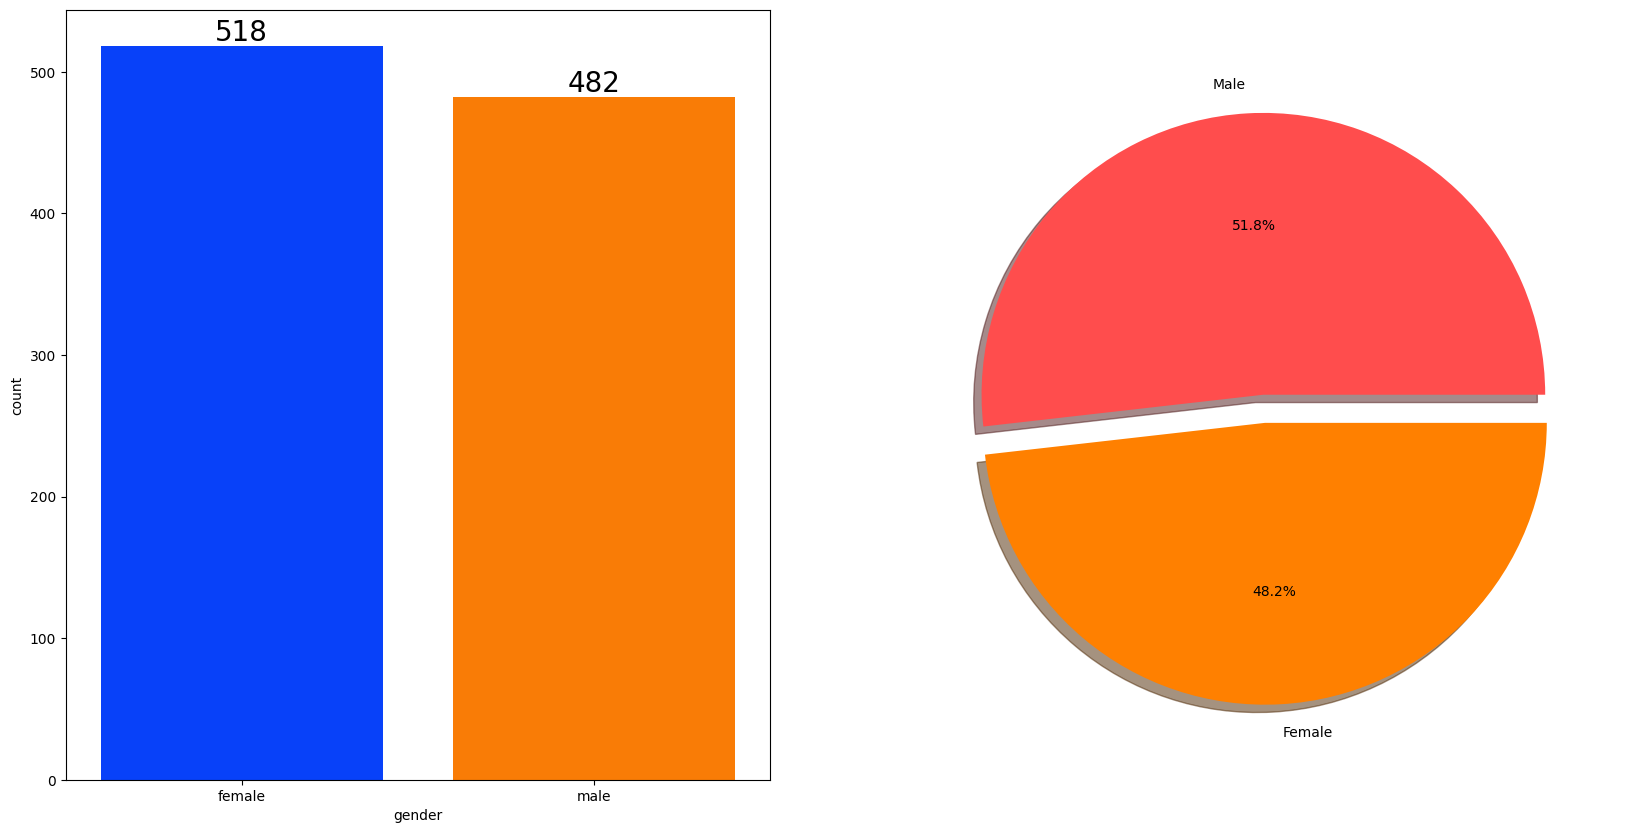

In [40]:
f, ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1], autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show() 

Insights:
Gender has balanced data with female students are 518 (51.8%) and male students are 482 (48.2%)


BIVARIATE ANALYSIS ( Does gender have any impact on student's performance ? )

gender_group = df.groupby('gender).mean()
gender_group

In [42]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group

,math_score,reading_score,writing_score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


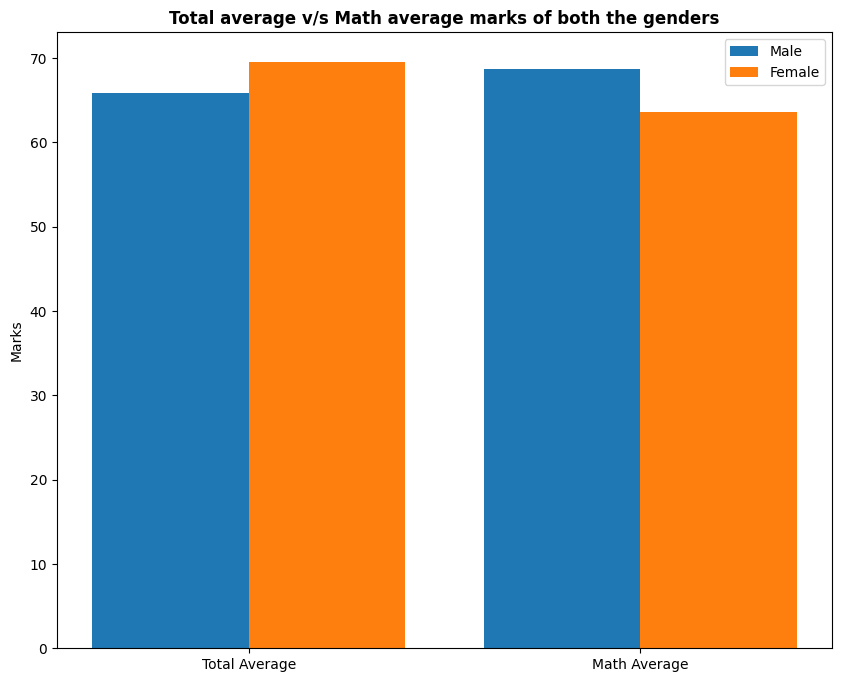

In [45]:
plt.figure(figsize=(10,8))

X = ["Total Average","Math Average"]

female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

On an average, females have higher scores than males but the latter have scored better in Mathematics

4.4.2 RACE/EHNICITY COLUMN

How is Group wise distribution ?

Does Race/Ehnicity have any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

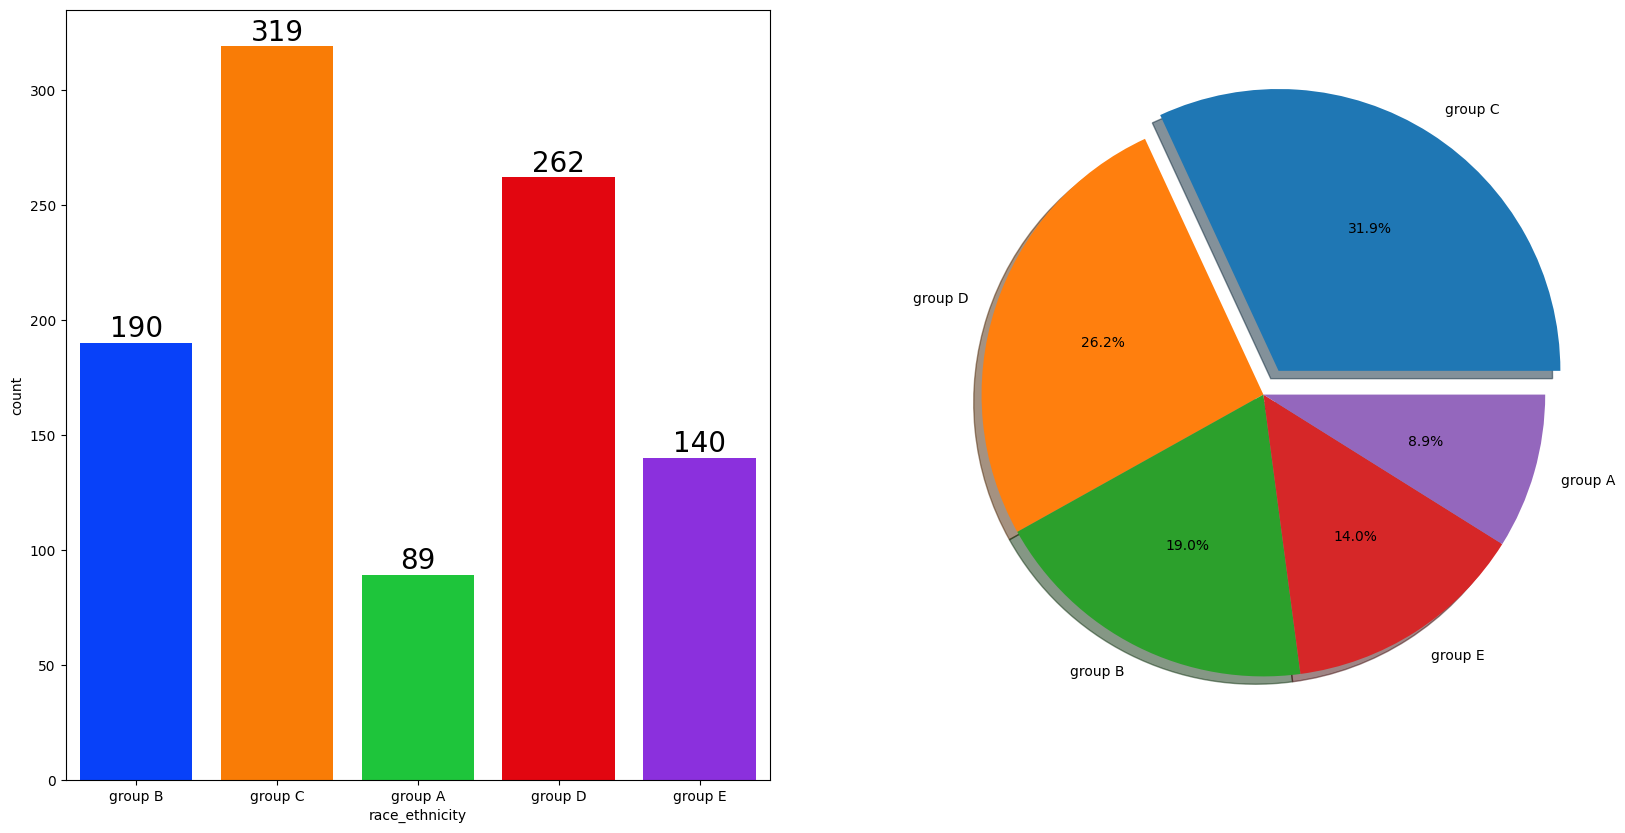

In [49]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

Insights

Most of the student belonging from group C /group D.

Lowest number of students belong to group A.

BIVARIATE ANALYSIS ( Does Race/Ehnicity have any impact on student's performance ? )


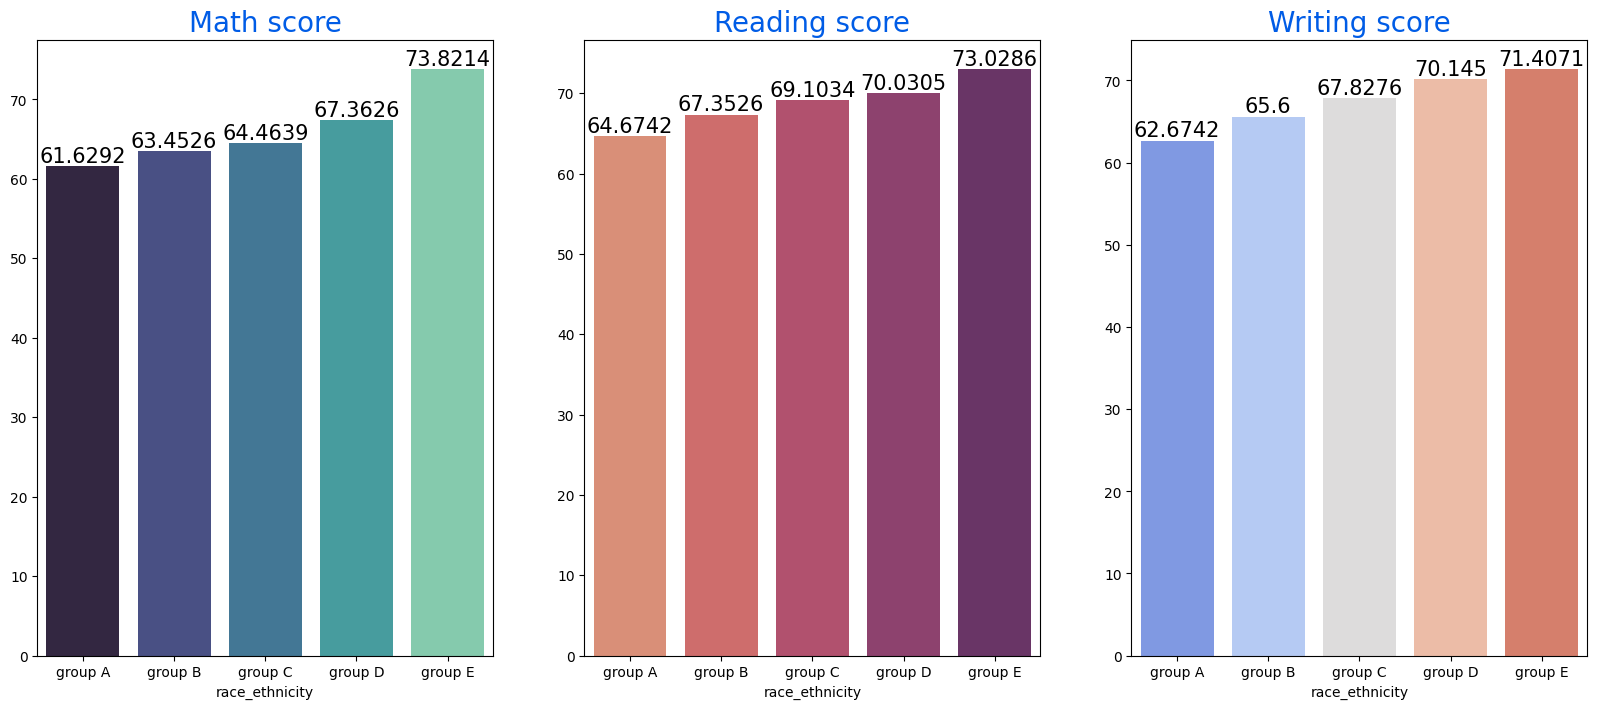

In [53]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights

Group E students have scored the highest marks.

Group A students have scored the lowest marks.

Students from a lower Socioeconomic status have a lower avg in all course subjects

4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN

What is educational background of student's parent ?

Is parental education has any impact on student's performance ?

UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )


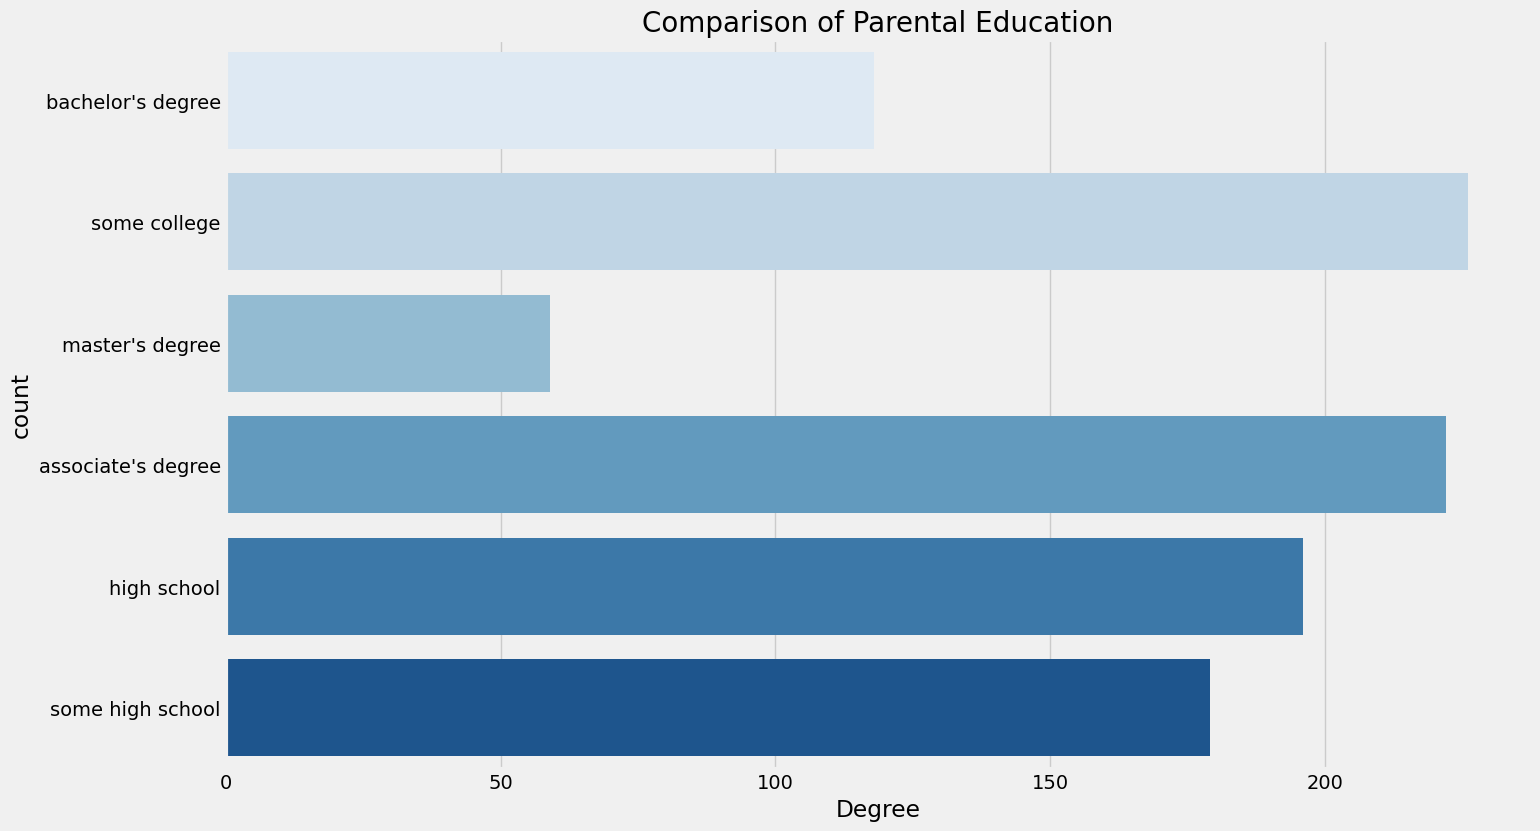

In [55]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

Most of the parents are from some college

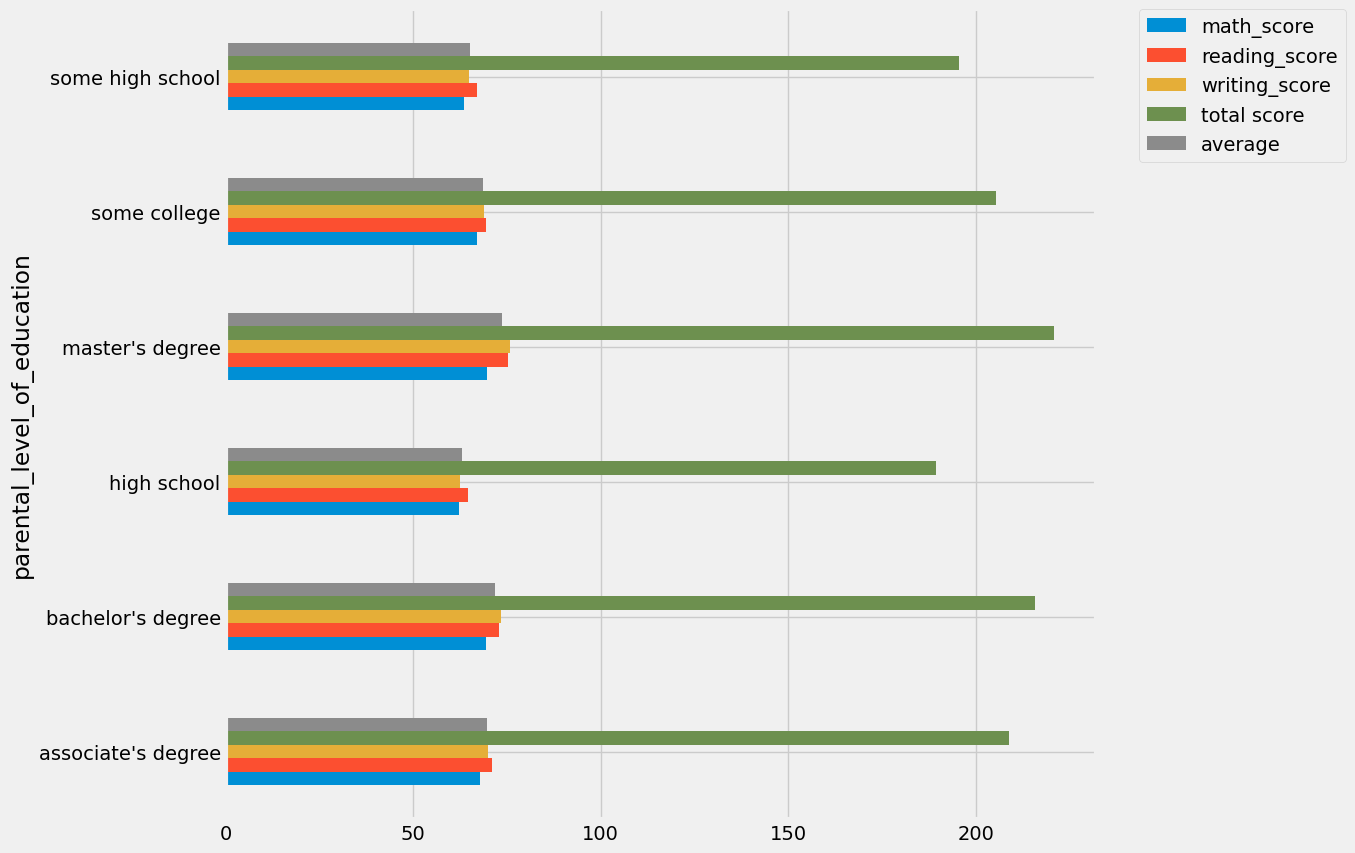

In [57]:
numeric_columns = df.select_dtypes(include=['number']).columns
df.groupby('parental_level_of_education')[numeric_columns].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Insights

The score of student whose parents possess master and bachelor level education are higher than others.

4.4.4 LUNCH COLUMN

Which type of lunch is most common amoung students ?

What is the effect of lunch type on test results?


UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

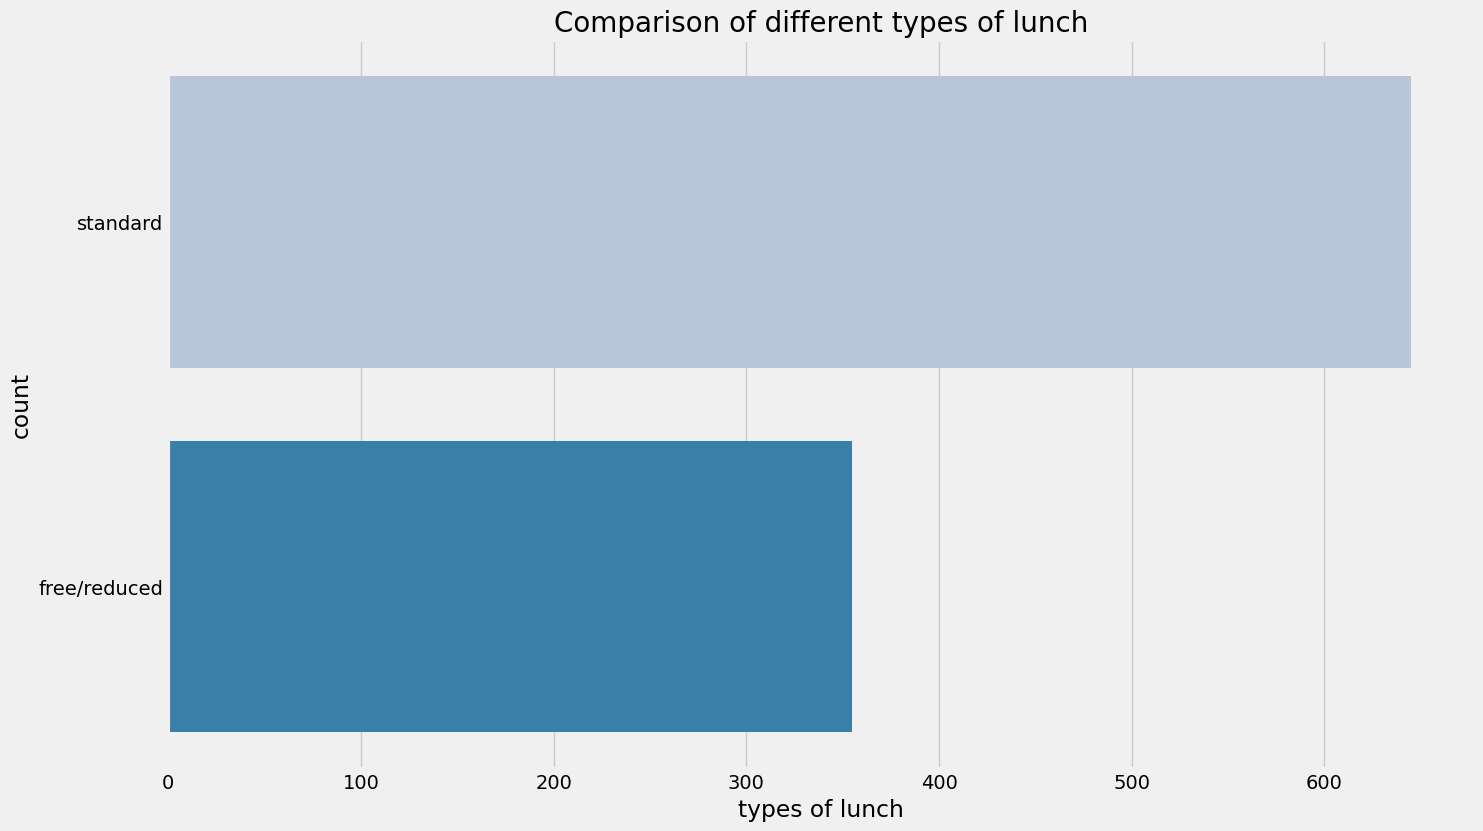

In [59]:
plt.rcParams['figure.figsize'] = (15, 9)
# plt.style.use('seaborn-talk')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Students being served standard lunch is more than the free lunch

Does lunch type intake have any impact on students' performance?

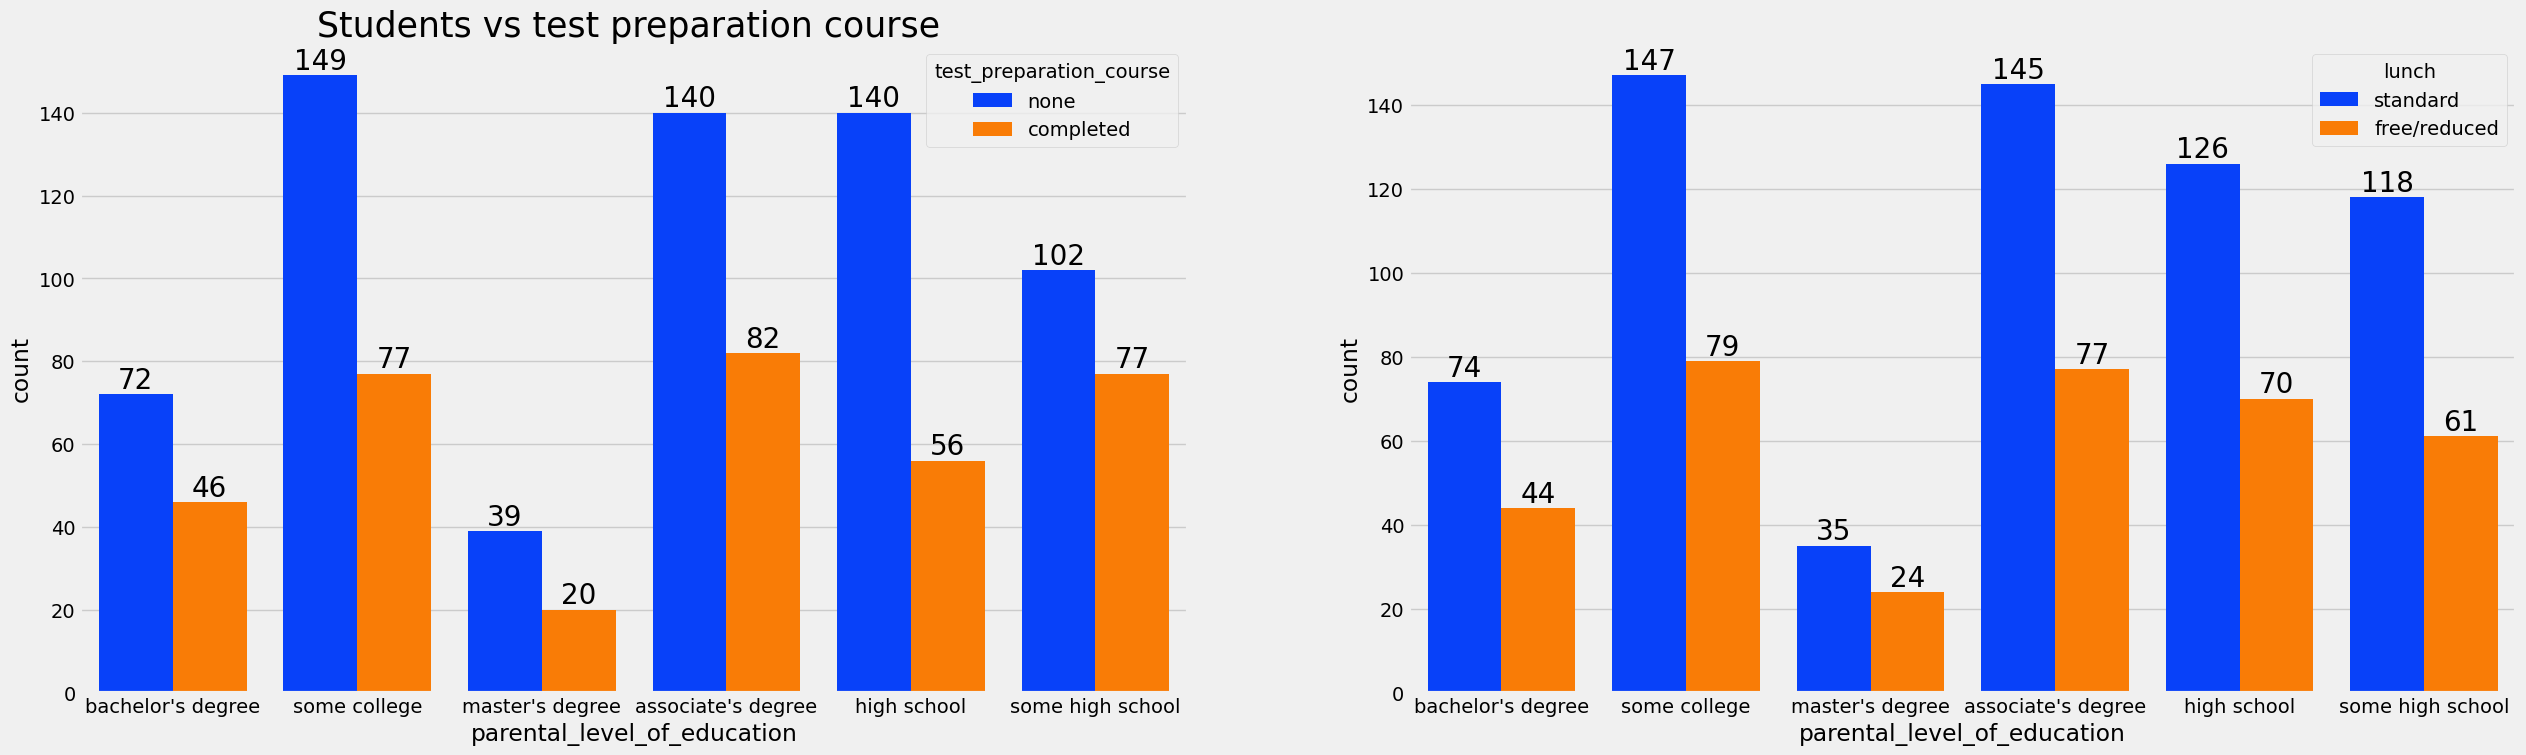

In [63]:
f,ax=plt.subplots(1,2,figsize=(28,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

Insights

Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

4.4.5 TEST PREPARATION COURSE COLUMN

Which type of lunch is most common amoung students ?

Is Test prepration course has any impact on student's performance ?

BIVARIATE ANALYSIS (Does Test prepration course have any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing_score'>

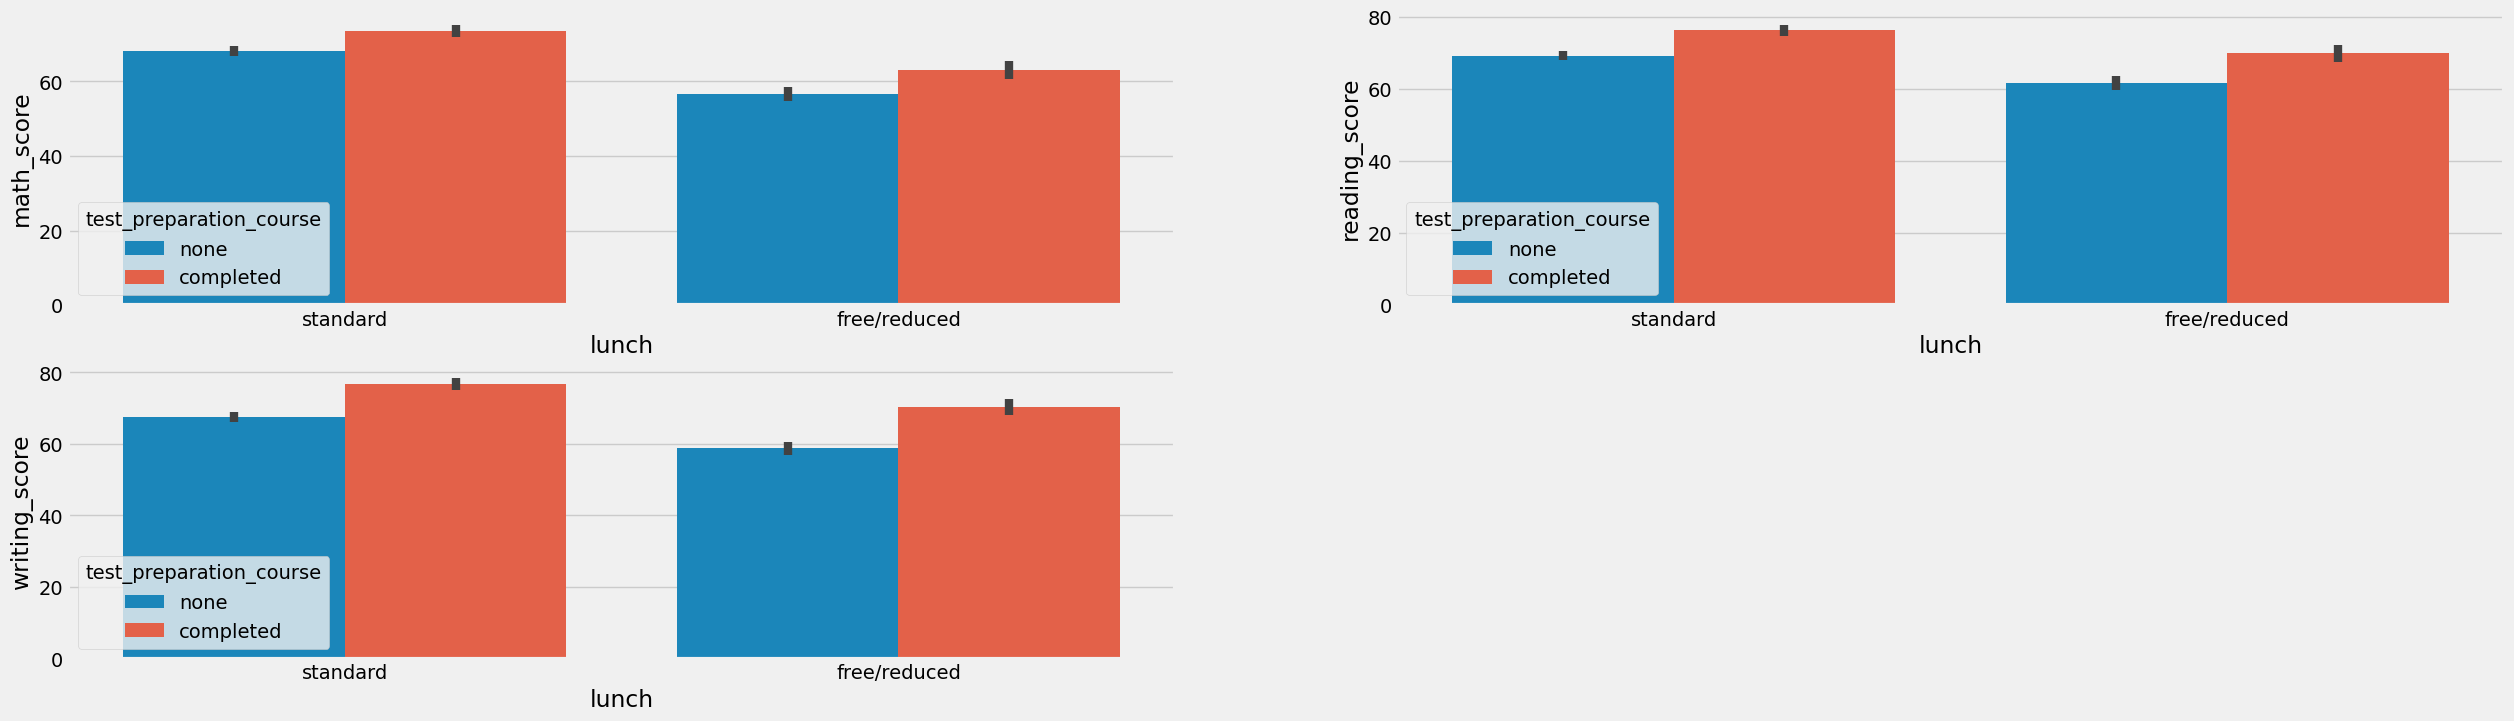

In [69]:
plt.figure(figsize=(28,8))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

Insights

Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course


4.4.6 CHECKING OUTLIERS

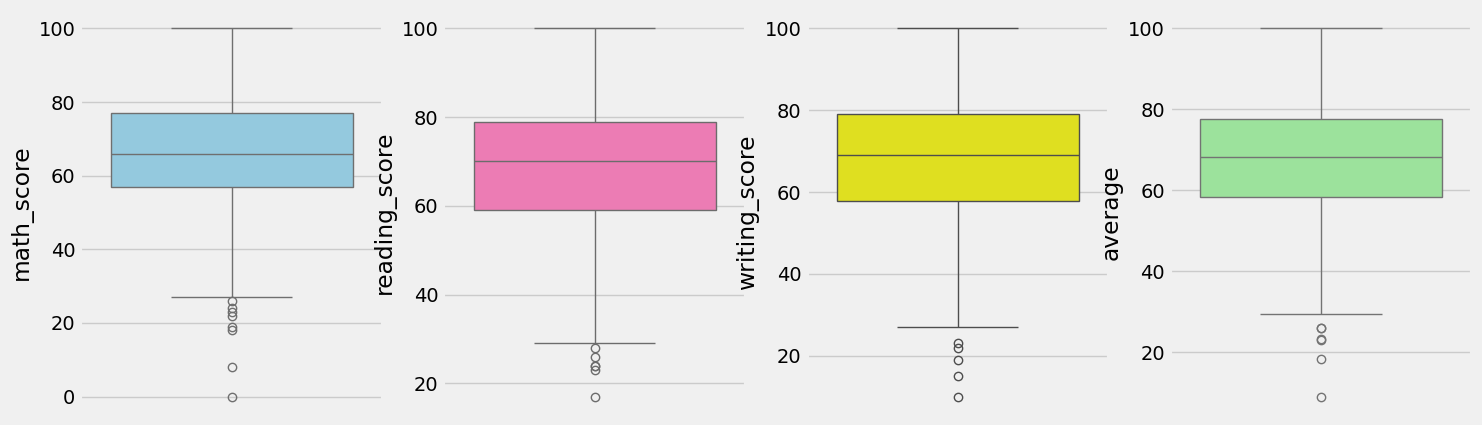

In [71]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

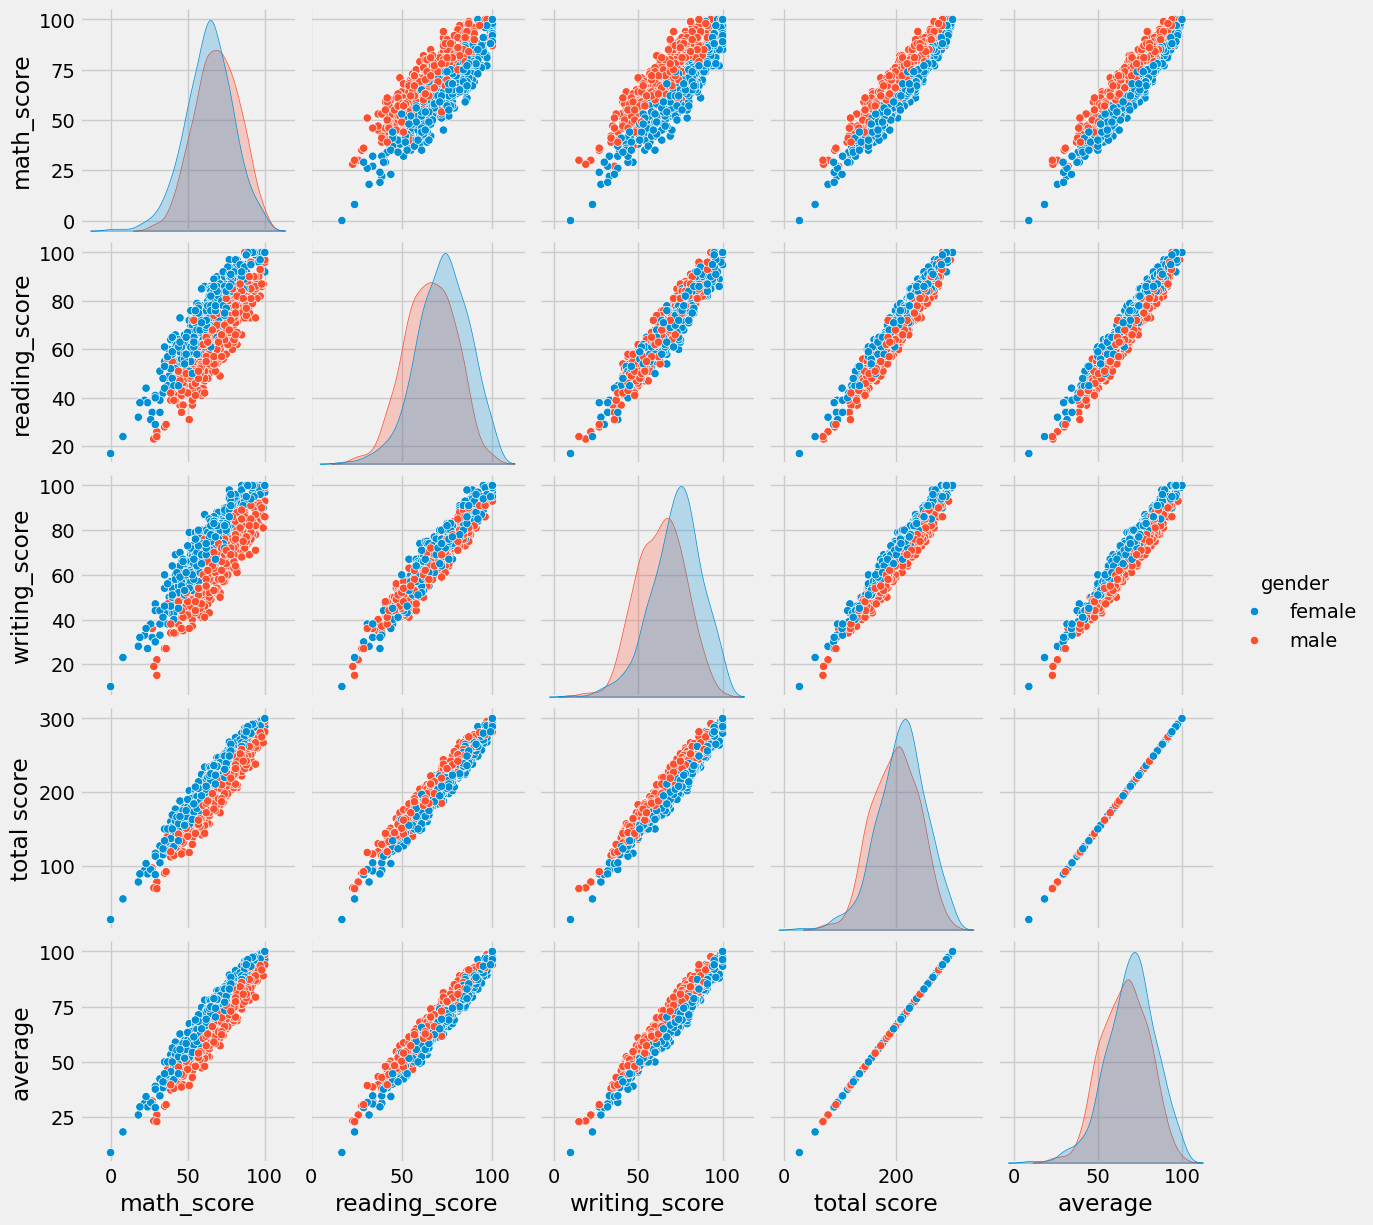

In [72]:
sns.pairplot(df,hue = 'gender')
plt.show()

Insights

From the above plot it is clear that all the scores increase linearly with each other.

5. Conclusions

Student's Performance is related with lunch, race, parental level education

Females lead in pass percentage and also are top-scorers

Student's Performance is not much related with test preparation course

Finishing preparation course is benefitial.

<Axes: >

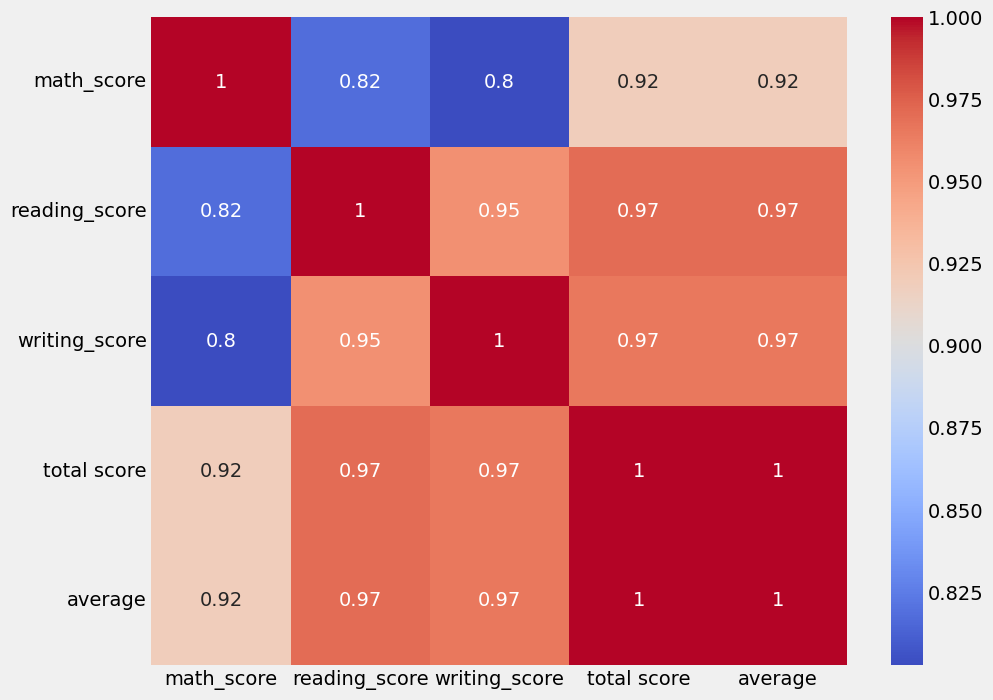

In [76]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       1000 non-null   object 
 1   race_ethnicity               1000 non-null   object 
 2   parental_level_of_education  1000 non-null   object 
 3   lunch                        1000 non-null   object 
 4   test_preparation_course      1000 non-null   object 
 5   math_score                   1000 non-null   int64  
 6   reading_score                1000 non-null   int64  
 7   writing_score                1000 non-null   int64  
 8   total score                  1000 non-null   int64  
 9   average                      1000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 78.3+ KB


In [78]:
from scipy.stats import pointbiserialr

# Point Biserial Correlation between lunch (binary: Free/Standard) and math_score
corr, p_value = pointbiserialr(df['lunch'].map({'free': 0, 'standard': 1}), df['math_score'])
print(f"Correlation: {corr}, P-value: {p_value}")


Correlation: nan, P-value: nan
